*NAME:R.MOHANA SHRI
ROLL NO:241801167*

Loading Iris dataset...

Standardizing features...
Scaled data shape: (150, 4)

CHOOSING OPTIMAL K USING SILHOUETTE METHOD
k=2: Silhouette Score = 0.5818
k=3: Silhouette Score = 0.4599
k=4: Silhouette Score = 0.3869
k=5: Silhouette Score = 0.3419
k=6: Silhouette Score = 0.3267
k=7: Silhouette Score = 0.3241
k=8: Silhouette Score = 0.3329
k=9: Silhouette Score = 0.3562
k=10: Silhouette Score = 0.3600

 Optimal k chosen: 2 (Silhouette Score: 0.5818)

Fitting final K-Means with k=2...
Final K-Means training complete!

CLUSTER INSPECTION

Cluster Labels (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Unique clusters: [0 1]

Cluster Sizes:
  Cluster 0: 100 samples
  Cluster 1: 50 samples

Mapping of Clusters to True Species:
(Rows=Predicted Clusters, Cols=True Species)
         setosa  versicolor  virginica
Cluster                               
0             0          50         50
1            50           0          0

PCA DIMENSIONALITY REDUCTION

Reducing features from 4D to 2D 

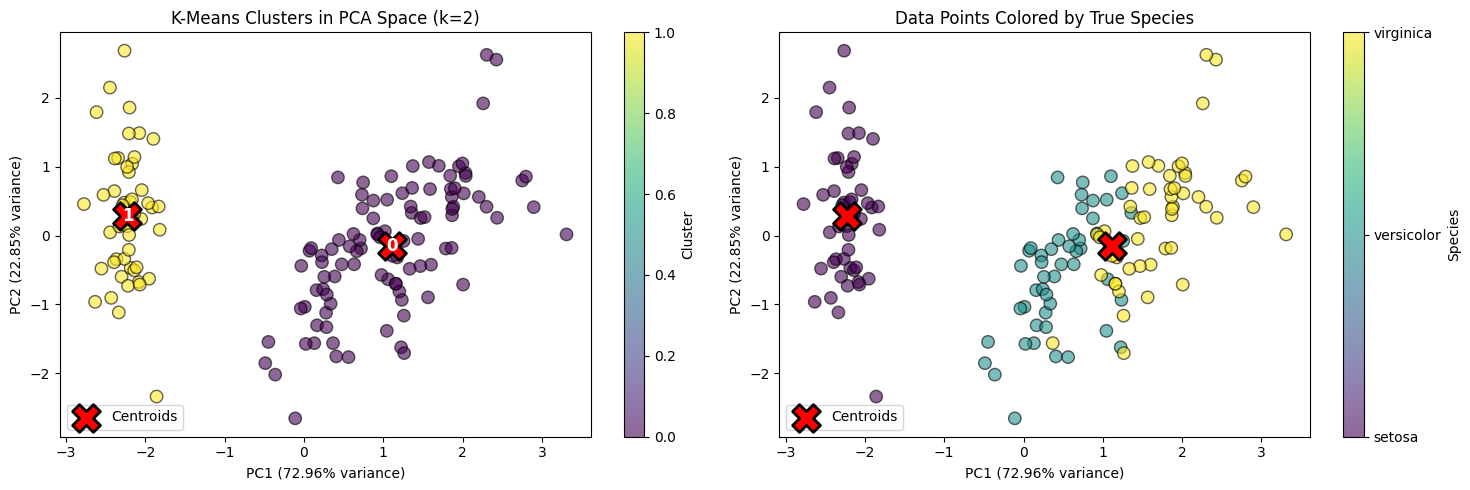


CLUSTER ANALYSIS SUMMARY

Optimal number of clusters: 2
Total samples: 150

Cluster Distribution:
  Cluster 0: 100 samples (66.7%)
  Cluster 1: 50 samples (33.3%)

Cluster Composition by Species:

  Cluster 0:
    setosa: 0 (0.0%)
    versicolor: 50 (50.0%)
    virginica: 50 (50.0%)

  Cluster 1:
    setosa: 50 (100.0%)
    versicolor: 0 (0.0%)
    virginica: 0 (0.0%)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load Iris dataset (features only)
print("Loading Iris dataset...")
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
species_names = iris.target_names
true_labels = iris.target


# 2. Preprocess - standardize features
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Scaled data shape: {X_scaled.shape}")

# 3. Choose k using silhouette method
print("\n" + "="*50)
print("CHOOSING OPTIMAL K USING SILHOUETTE METHOD")
print("="*50)

k_range = range(2, 11)
silhouette_scores = []
kmeans_models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    kmeans_models[k] = kmeans
    print(f"k={k}: Silhouette Score = {sil_score:.4f}")

optimal_k = list(k_range)[np.argmax(silhouette_scores)]
print(f"\n Optimal k chosen: {optimal_k} (Silhouette Score: {max(silhouette_scores):.4f})")

# 4. Fit final K-Means with chosen k
print(f"\nFitting final K-Means with k={optimal_k}...")
final_kmeans = kmeans_models[optimal_k]
cluster_labels = final_kmeans.fit_predict(X_scaled)
cluster_centers = final_kmeans.cluster_centers_
print("Final K-Means training complete!")

# 5. Inspect clusters
print("\n" + "="*50)
print("CLUSTER INSPECTION")
print("="*50)

print(f"\nCluster Labels (first 20): {cluster_labels[:20]}")
print(f"Unique clusters: {np.unique(cluster_labels)}")

print("\nCluster Sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
for cluster_id, size in cluster_sizes.items():
    print(f"  Cluster {cluster_id}: {size} samples")

# Compare with true species labels
print("\nMapping of Clusters to True Species:")
print("(Rows=Predicted Clusters, Cols=True Species)")
cluster_species_mapping = pd.crosstab(
    cluster_labels, 
    true_labels, 
    rownames=['Cluster'], 
    colnames=['Species']
)
cluster_species_mapping.columns = species_names
print(cluster_species_mapping)

# NEW: 2. Dimensionality Reduction with PCA
print("\n" + "="*50)
print("PCA DIMENSIONALITY REDUCTION")
print("="*50)

# a. Reduce to 2D using PCA
print("\nReducing features from 4D to 2D using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA-transformed data shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")
print(f"PCA components:\n{pca.components_}")

# Transform cluster centers to PCA space
cluster_centers_pca = pca.transform(cluster_centers)
print(f"\nCluster centers in PCA space:\n{cluster_centers_pca}")

# b. Plot cluster centers and data points in 2D PCA space
print("\nGenerating PCA visualization...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Clusters colored by assigned cluster label
ax1 = axes[0]
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                       c=cluster_labels, cmap='viridis', s=80, alpha=0.6, edgecolors='k')
ax1.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            c='red', marker='X', s=400, edgecolors='black', linewidths=2, label='Centroids')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_title(f'K-Means Clusters in PCA Space (k={optimal_k})')
ax1.legend()
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Add cluster labels to plot points
for i, cluster_id in enumerate(np.unique(cluster_labels)):
    mask = cluster_labels == cluster_id
    ax1.text(cluster_centers_pca[cluster_id, 0], cluster_centers_pca[cluster_id, 1],
             str(cluster_id), fontsize=12, fontweight='bold', color='white',
             ha='center', va='center')

# Plot 2: Data points colored by true species labels
ax2 = axes[1]
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], 
                       c=true_labels, cmap='viridis', s=80, alpha=0.6, edgecolors='k')
ax2.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            c='red', marker='X', s=400, edgecolors='black', linewidths=2, label='Centroids')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('Data Points Colored by True Species')
ax2.legend()
cbar2 = plt.colorbar(scatter2, ax=ax2, label='Species', ticks=[0, 1, 2])
cbar2.set_ticklabels(species_names)

plt.tight_layout()
plt.show()

# 3. Analyze cluster sizes and mapping to true species
print("\n" + "="*50)
print("CLUSTER ANALYSIS SUMMARY")
print("="*50)

print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Total samples: {len(cluster_labels)}")

print("\nCluster Distribution:")
for cluster_id in range(optimal_k):
    size = cluster_sizes[cluster_id]
    percentage = (size / len(cluster_labels)) * 100
    print(f"  Cluster {cluster_id}: {size} samples ({percentage:.1f}%)")

print("\nCluster Composition by Species:")
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    cluster_species = true_labels[mask]
    species_dist = np.bincount(cluster_species, minlength=len(species_names))
    print(f"\n  Cluster {cluster_id}:")
    for sp_idx, count in enumerate(species_dist):
        percentage = (count / cluster_sizes[cluster_id]) * 100 if cluster_sizes[cluster_id] > 0 else 0
        print(f"    {species_names[sp_idx]}: {count} ({percentage:.1f}%)")

